In [1]:
from nba_api.stats.endpoints import playercareerstats
import pandas as pd
import time

In [2]:
from nba_api.stats.static import players
all_players = players.get_players()

Players={}
for player in all_players:
    Players[player['full_name']]=player['id']
Players

{'Alaa Abdelnaby': 76001,
 'Zaid Abdul-Aziz': 76002,
 'Kareem Abdul-Jabbar': 76003,
 'Mahmoud Abdul-Rauf': 51,
 'Tariq Abdul-Wahad': 1505,
 'Shareef Abdur-Rahim': 949,
 'Tom Abernethy': 76005,
 'Forest Able': 76006,
 'John Abramovic': 76007,
 'Alex Abrines': 203518,
 'Precious Achiuwa': 1630173,
 'Alex Acker': 101165,
 'Donald Ackerman': 76008,
 'Mark Acres': 76009,
 'Charles Acton': 76010,
 'Quincy Acy': 203112,
 'Alvan Adams': 76011,
 'Don Adams': 76012,
 'Hassan Adams': 200801,
 'Jaylen Adams': 1629121,
 'Jordan Adams': 203919,
 'Michael Adams': 149,
 'Steven Adams': 203500,
 'Rafael Addison': 912,
 'Bam Adebayo': 1628389,
 'Deng Adel': 1629061,
 'Rick Adelman': 76015,
 'Jeff Adrien': 202399,
 'Arron Afflalo': 201167,
 'Ochai Agbaji': 1630534,
 'Maurice Ager': 200772,
 'Mark Aguirre': 76016,
 'Blake Ahearn': 201336,
 'Danny Ainge': 76017,
 'Alexis Ajinca': 201582,
 'Henry Akin': 76018,
 'James Akinjo': 1631231,
 'Josh Akognon': 203006,
 'DeVaughn Akoon-Purcell': 1629152,
 'Solomon A

In [ ]:
from nba_api.stats.endpoints import playercareerstats
Rookie_Seasons={}

for player,player_id in Players.items():
    try:
        career = playercareerstats.PlayerCareerStats(player_id=player_id, ).get_data_frames()[0]

In [8]:
from nba_api.stats.endpoints import playercareerstats
Rookie_Seasons={}

for player,player_id in Players.items():
    try:
        career = playercareerstats.PlayerCareerStats(player_id=player_id).get_data_frames()[0]
        
        career_length=len(set(career['SEASON_ID']))
        rookie_season=career.loc[0]
        
        
        Rookie_Seasons[player]=rookie_season
        Rookie_Seasons[player]['5Y']=career_length>=5
        Rookie_Seasons[player]['Longevity']=career_length
        
        Rookie_Seasons[player]['Longevity in drafted franchise']=len(career[career['TEAM_ABBREVIATION']==rookie_season['TEAM_ABBREVIATION']])
        
        
    except:
        print("No data for",player)
    
    time.sleep(0.1)
    

C:\Users\remib\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()
C:\Users\remib\anaconda3\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


No data for James Akinjo
No data for Adonis Arms
No data for Mark Armstrong
No data for Armando Bacot
No data for Charles Bediako
No data for Marqus Blakely
No data for Trevon Bluiett
No data for Keion Brooks Jr.
No data for Brian Butch
No data for Da'Sean Butler
No data for Corky Calhoun
No data for Rick Calloway
No data for Branden Carlson
No data for Devin Carter
No data for Cam Christie
No data for Jaylen Clark
No data for Isaiah Crawford
No data for Caleb Daniels
No data for N'Faly Dante
No data for Jesse Edwards
No data for Boogie Ellis
No data for Aaron Estrada
No data for Max Fiedler
No data for Trentyn Flowers
No data for Tony Gaffney
No data for Jaylin Galloway
No data for Elijah Harkless
No data for Kenny Hasbrouck
No data for Herbert Hill
No data for Blake Hinson
No data for DaRon Holmes II
No data for Caleb Homesley
No data for Joel Ingram
No data for Curtis Jerrells
No data for Keshad Johnson
No data for Kylor Kelley
No data for Bobi Klintman
No data for Miller Kopp
No da

In [9]:
print(len(Rookie_Seasons))

4923


In [10]:
for player,stats in Rookie_Seasons.items():
    stats=pd.DataFrame(stats)
    stats=stats.fillna(0)
    Rookie_Seasons[player]=stats[0]

Rookie_Seasons["LeBron James"]

PLAYER_ID                               2544
SEASON_ID                            2003-04
LEAGUE_ID                                 00
TEAM_ID                           1610612739
TEAM_ABBREVIATION                        CLE
PLAYER_AGE                              19.0
GP                                        79
GS                                        79
MIN                                   3120.0
FGM                                      622
FGA                                     1492
FG_PCT                                 0.417
FG3M                                      63
FG3A                                     217
FG3_PCT                                 0.29
FTM                                      347
FTA                                      460
FT_PCT                                 0.754
OREB                                      99
DREB                                     333
REB                                      432
AST                                      465
STL       

In [11]:
for player, stats in Rookie_Seasons.items():

    GP=stats['GP']
    stats['MIN']/=GP
    stats['FGM']/=GP
    stats['FGA']/=GP
    stats['FG3M']/=GP
    stats['FG3A']/=GP
    stats['FTM']/=GP
    stats['FTA']/=GP
    stats['REB']/=GP
    stats['OREB']/=GP
    stats['DREB']/=GP
    stats['AST']/=GP
    stats['TOV']/=GP
    stats['STL']/=GP
    stats['PF']/=GP
    stats['PTS']/=GP
    stats['BLK']/=GP
    stats['SEASON_ID']=int(stats['SEASON_ID'][:-3])
    
    #print(player,stats)
#Rookie_Seasons

In [12]:
Rookie_Seasons = pd.DataFrame(Rookie_Seasons).T
Rookie_Seasons.to_csv("Rookie_Seasons.csv", index=True, sep=",")

In [13]:
Rookie_Seasons_train = Rookie_Seasons[Rookie_Seasons['SEASON_ID']<=2019]
Rookie_Seasons_test = Rookie_Seasons[Rookie_Seasons['SEASON_ID']>2019]

In [14]:
Rookie_Seasons_test = pd.DataFrame(Rookie_Seasons_test)
Rookie_Seasons_train = pd.DataFrame(Rookie_Seasons_train)
Rookie_Seasons_train.to_csv("Rookie_Seasons_train.csv", index=True, sep=",")
Rookie_Seasons_test.to_csv("Rookie_Seasons_test.csv", index=True, sep=",")

# What team draft the best ? (number and % of players that played >5Y)

In [15]:
from nba_api.stats.static import teams
Teams=teams.get_teams()


Drafting_Teams={}
for team in Teams:
    Drafting_Teams[team['abbreviation']]=[0,0,0]
    
for i in range(len(Rookie_Seasons_train)):
    
    team = Rookie_Seasons_train.iloc[i]['TEAM_ABBREVIATION']
    
    if team not in Drafting_Teams.keys():
        continue
   
    Drafting_Teams[team][1]+=1
    if Rookie_Seasons_train.iloc[i]['5Y']:
        Drafting_Teams[team][0]+=1
        
        
for team in Drafting_Teams:
    Drafting_Teams[team][2]=Drafting_Teams[team][0] /Drafting_Teams[team][1]
    
print(Drafting_Teams)

{'ATL': [60, 150, 0.4], 'BOS': [80, 206, 0.3883495145631068], 'CLE': [62, 136, 0.45588235294117646], 'NOP': [8, 18, 0.4444444444444444], 'CHI': [77, 143, 0.5384615384615384], 'DAL': [50, 109, 0.45871559633027525], 'DEN': [57, 111, 0.5135135135135135], 'GSW': [35, 65, 0.5384615384615384], 'HOU': [71, 125, 0.568], 'LAC': [42, 99, 0.42424242424242425], 'LAL': [77, 154, 0.5], 'MIA': [39, 79, 0.4936708860759494], 'MIL': [60, 110, 0.5454545454545454], 'MIN': [41, 77, 0.5324675324675324], 'BKN': [9, 25, 0.36], 'NYK': [88, 225, 0.39111111111111113], 'ORL': [34, 71, 0.4788732394366197], 'IND': [54, 103, 0.5242718446601942], 'PHI': [44, 76, 0.5789473684210527], 'PHX': [63, 151, 0.41721854304635764], 'POR': [70, 141, 0.49645390070921985], 'SAC': [44, 96, 0.4583333333333333], 'SAS': [28, 52, 0.5384615384615384], 'OKC': [16, 35, 0.45714285714285713], 'TOR': [31, 59, 0.5254237288135594], 'UTA': [35, 68, 0.5147058823529411], 'MEM': [25, 69, 0.36231884057971014], 'WAS': [69, 140, 0.4928571428571429], 

Among the 5YPlayers, what %age of their seasons these players spend on their drafting teams ? AKA the propensity for a team to keep it's best drafted players

In [16]:
Teams=teams.get_teams()
TEAMS={}
for team in Teams:
    TEAMS[team['abbreviation']]=[0,0,0]
n=len(Rookie_Seasons_train)

for i in range(n):
    
    drafting_team = Rookie_Seasons_train.iloc[i]['TEAM_ABBREVIATION']
    if drafting_team not in TEAMS.keys():
        continue
    career_length = Rookie_Seasons_train.iloc[i]['Longevity']
    loyalty = Rookie_Seasons_train.iloc[i]['Longevity in drafted franchise']
    
    TEAMS[drafting_team][0]+=career_length
    TEAMS[drafting_team][1]+=loyalty

for team in TEAMS:
    TEAMS[team][2]=TEAMS[team][1] /TEAMS[team][0]
    
print(TEAMS)

    

{'ATL': [760, 416, 0.5473684210526316], 'BOS': [1008, 608, 0.6031746031746031], 'CLE': [763, 387, 0.5072083879423329], 'NOP': [68, 33, 0.4852941176470588], 'CHI': [920, 431, 0.46847826086956523], 'DAL': [615, 321, 0.5219512195121951], 'DEN': [639, 305, 0.47730829420970267], 'GSW': [378, 197, 0.5211640211640212], 'HOU': [730, 341, 0.4671232876712329], 'LAC': [572, 263, 0.4597902097902098], 'LAL': [926, 446, 0.4816414686825054], 'MIA': [470, 252, 0.5361702127659574], 'MIL': [678, 336, 0.49557522123893805], 'MIN': [490, 231, 0.4714285714285714], 'BKN': [99, 55, 0.5555555555555556], 'NYK': [1054, 577, 0.547438330170778], 'ORL': [430, 189, 0.43953488372093025], 'IND': [631, 344, 0.5451664025356577], 'PHI': [506, 201, 0.39723320158102765], 'PHX': [772, 379, 0.49093264248704666], 'POR': [850, 411, 0.4835294117647059], 'SAC': [536, 248, 0.4626865671641791], 'SAS': [323, 170, 0.5263157894736842], 'OKC': [188, 97, 0.5159574468085106], 'TOR': [380, 176, 0.4631578947368421], 'UTA': [423, 193, 0.45

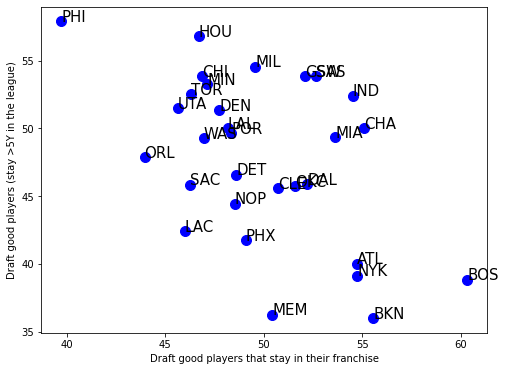

In [17]:
import matplotlib.pyplot as pl
teams = list(TEAMS.keys())
X=[TEAMS[team][2]*100 for team in teams]
Y=[Drafting_Teams[team][2]*100 for team in teams]

pl.figure(figsize=(8, 6))
pl.scatter(X, Y, color="blue", s=100)

for i, team in enumerate(teams):
    pl.text(X[i], Y[i], team, fontsize=15)
    
pl.xlabel("Draft good players that stay in their franchise")
pl.ylabel("Draft good players (stay >5Y in the league)")
pl.show()

In [18]:
drafting_data = {
    "Team": list(Drafting_Teams.keys()),
    "Drafting Good Players(raw)": [Drafting_Teams[team][0] for team in Drafting_Teams],
    "Total drafted Players": [Drafting_Teams[team][1] for team in Drafting_Teams],
    "Drafting Good Players(%)": [Drafting_Teams[team][2] for team in Drafting_Teams],
    "Years spent by drafted players here": [TEAMS[team][0] for team in TEAMS],
    "Years spent by drafted players in the league": [TEAMS[team][1] for team in TEAMS],
    "Drafting Loyal Players": [TEAMS[team][2] for team in TEAMS]
}
drafting_data_df = pd.DataFrame(drafting_data)
drafting_data_df.to_csv("team_drafting_data.csv", index=False)
drafting_data_df

,Team,Drafting Good Players(raw),Total drafted Players,Drafting Good Players(%),Years spent by drafted players here,Years spent by drafted players in the league,Drafting Loyal Players
0,ATL,60,150,0.400000,760,416,0.547368
1,BOS,80,206,0.388350,1008,608,0.603175
2,CLE,62,136,0.455882,763,387,0.507208
3,NOP,8,18,0.444444,68,33,0.485294
4,CHI,77,143,0.538462,920,431,0.468478
5,DAL,50,109,0.458716,615,321,0.521951
6,DEN,57,111,0.513514,639,305,0.477308
7,GSW,35,65,0.538462,378,197,0.521164
8,HOU,71,125,0.568000,730,341,0.467123
9,LAC,42,99,0.424242,572,263,0.459790


# Now let's build a model to predict the chances for the lately drafted players to make it >5Y

#### We will take all the rookie seasons from players that were drafted before 2020 to make a model (train and test it), and then use the seasons from players drafted after 2020 to see what our model predicts for them.

In [2]:
Rookie_Seasons=pd.read_csv("Rookie_Seasons.csv",index_col=0)

Rookie_Seasons_train = Rookie_Seasons[Rookie_Seasons['SEASON_ID']<=2019].drop(["PLAYER_ID","LEAGUE_ID"],axis=1)
Rookie_Seasons_test = Rookie_Seasons[Rookie_Seasons['SEASON_ID']>2019].drop(["PLAYER_ID","LEAGUE_ID"],axis=1)

In [8]:
Rookie_Seasons_train.to_csv("Rookie_Seasons_train.csv", index=True, sep=",")
Rookie_Seasons_test.to_csv("Rookie_Seasons_test.csv", index=True, sep=",")

In [9]:
Rookie_Seasons_train

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,5Y,Longevity,Longevity in drafted franchise
Alaa Abdelnaby,1990,1610612757,POR,23.0,43,0,6.744186,1.279070,2.697674,0.474,...,2.069767,0.279070,0.093023,0.279070,0.511628,0.906977,3.139535,True,5,2
Zaid Abdul-Aziz,1968,1610612749,MIL,23.0,29,0,28.862069,4.344828,11.965517,0.363,...,13.034483,1.137931,0.000000,0.000000,0.000000,3.379310,11.034483,True,10,2
Kareem Abdul-Jabbar,1969,1610612749,MIL,23.0,82,0,43.097561,11.439024,22.073171,0.518,...,14.512195,4.109756,0.000000,0.000000,0.000000,3.451220,28.792683,True,20,6
Mahmoud Abdul-Rauf,1990,1610612743,DEN,22.0,67,19,22.462687,6.223881,15.059701,0.413,...,1.805970,3.074627,0.820896,0.059701,1.641791,2.223881,14.059701,True,9,6
Tariq Abdul-Wahad,1997,1610612758,SAC,23.0,59,16,16.254237,2.440678,6.050847,0.403,...,1.966102,0.864407,0.593220,0.220339,1.101695,1.372881,6.372881,True,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bill Zopf,1970,1610612749,MIL,23.0,53,0,7.509434,0.924528,2.547170,0.363,...,0.867925,1.377358,0.000000,0.000000,0.000000,0.641509,2.226415,False,1,1
Ivica Zubac,2016,1610612747,LAL,20.0,38,11,16.026316,3.315789,6.263158,0.529,...,4.184211,0.789474,0.368421,0.868421,0.789474,1.736842,7.473684,True,9,3
Matt Zunic,1948,1610610036,WAS,29.0,56,0,0.000000,1.750000,5.767857,0.303,...,0.000000,0.892857,0.000000,0.000000,0.000000,3.250000,4.875000,False,1,1
Vlatko Čančar,2019,1610612743,DEN,23.0,14,0,3.214286,0.428571,1.071429,0.400,...,0.714286,0.214286,0.071429,0.071429,0.214286,0.500000,1.214286,True,5,5


In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report


from matplotlib import pyplot as pl
import seaborn as sns

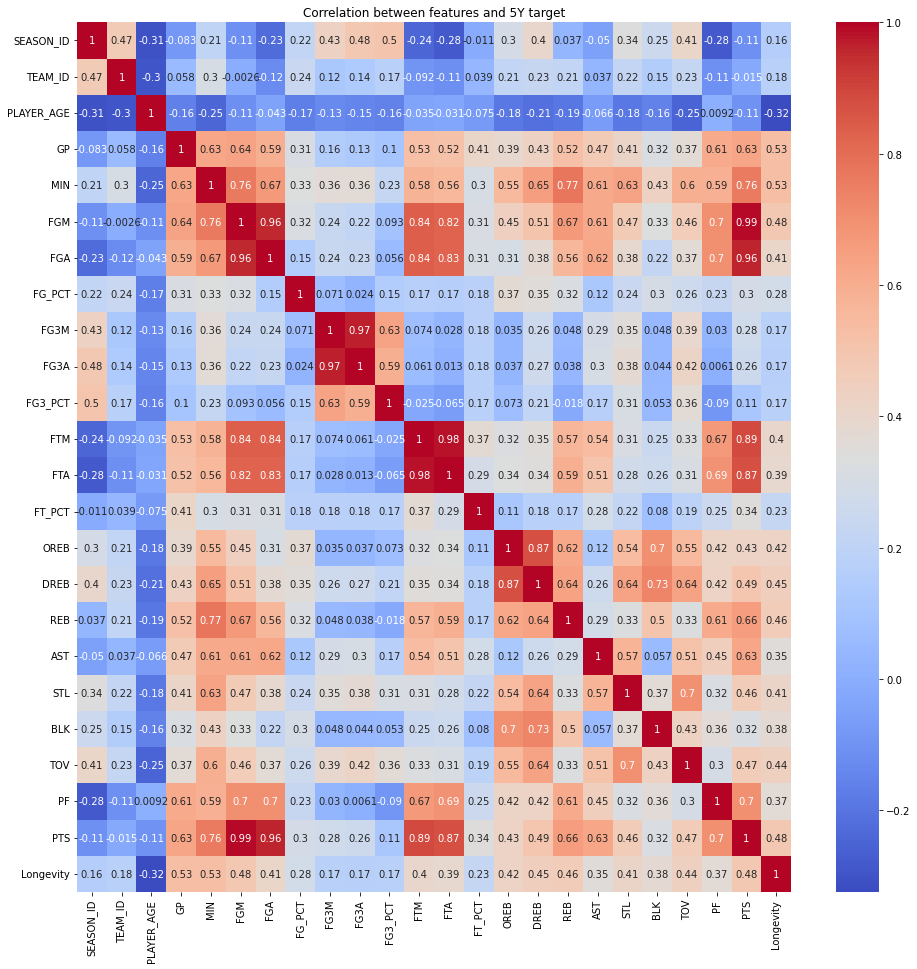

In [11]:
correlation = Rookie_Seasons_train.drop(['5Y','TEAM_ABBREVIATION', 'GS', 'Longevity in drafted franchise'],axis=1).corr()

pl.figure(figsize=(16,16))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
pl.title("Correlation between features and 5Y target")
pl.show()

### A few things to note :
- What matters most for 5Y prediction is Games Played, Minutes played per game and Field Goals Made per game
- Age is negatively correlated, which means that the younger a player is drafted, the more chance he has of making it >5Y (kind of logic since players are drafted young when they are deemed worthy and have a lot of potential, and players are drafted older when they didn't have the talent to make it younger) 
- Also, GP and Age are pretty much independent, which entails that players play whether they are good or not, and we don't see an increase of play time for younger players for potential and developpment sake. It's a tough and fast paced industry first and foremost
- Player age is negatively correlated with Season_id, meaning that players are drafted younger now compared to earlier in time (better scouting, more emphasis on potential and better processes for players to reach peak fitness and basketball skills)

 We can also observe the feature importance change year to year. 3 pointers were legitimately unconsidered until ~2015-16, and we can clearly see an increase in the correlation between 3PM, 3PA and 3P% and 5Y for Rookies playing after 2016.

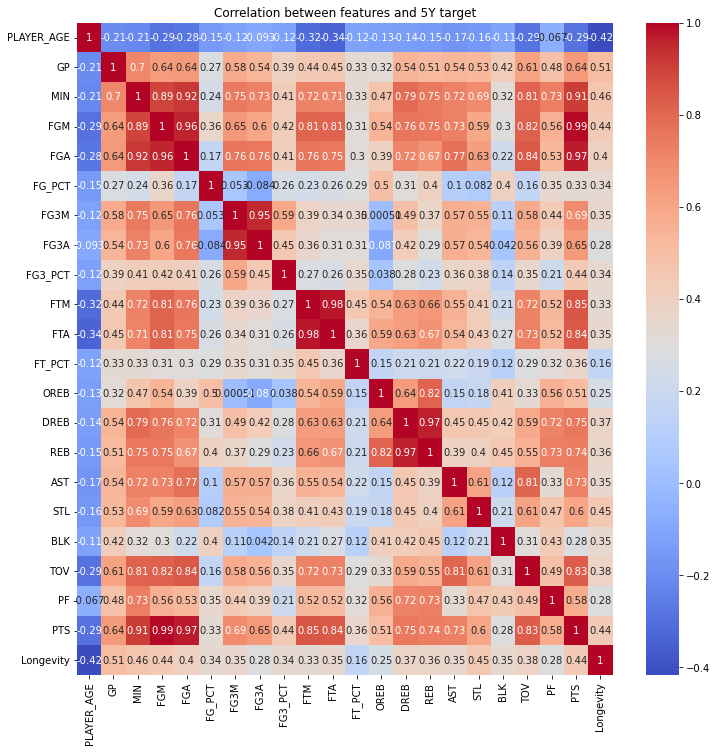

In [12]:
correlation = Rookie_Seasons_train[Rookie_Seasons_train['SEASON_ID']>2018].drop(['5Y','SEASON_ID','TEAM_ID','TEAM_ABBREVIATION', 'GS', 'Longevity in drafted franchise'],axis=1).corr()

pl.figure(figsize=(12,12))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
pl.title("Correlation between features and 5Y target")
pl.show()

In [13]:
Useless_Features = ['5Y','TEAM_ABBREVIATION','TEAM_ID', 'GS','Longevity', 'Longevity in drafted franchise']

In [18]:
parameter_set = Rookie_Seasons_train.drop(Useless_Features,axis=1).columns.values
labels = Rookie_Seasons_train['5Y'].values
#names = Rookie_Seasons_train['PLAYER_NAME'].values.tolist() 
Rookie_Seasons_values = Rookie_Seasons_train.drop(Useless_Features,axis=1).values

X = MinMaxScaler().fit_transform(Rookie_Seasons_values)

In [28]:
n = 30
scores = []

for i in range(n):

    X_train, X_test, y_train, y_test = train_test_split(Rookie_Seasons_values, labels, test_size=0.25, random_state=i)

    model = DecisionTreeClassifier(max_depth=4, random_state=2*i)
    model.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
print("Accuracy:", np.mean(scores))
#print("\nClassification Report:\n", classification_report(y_test, y_pred))
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

0.7652877697841727
0.7464028776978417
0.7760791366906474
0.7446043165467626
0.7616906474820144
0.7634892086330936
0.7446043165467626
0.7634892086330936
0.7787769784172662
0.7589928057553957
0.7607913669064749
0.7751798561151079
0.7580935251798561
0.7805755395683454
0.7652877697841727
0.762589928057554
0.7329136690647482
0.7616906474820144
0.7643884892086331
0.7437050359712231
0.7580935251798561
0.7643884892086331
0.7589928057553957
0.7724820143884892
0.7814748201438849
0.7688848920863309
0.7751798561151079
0.7598920863309353
0.7589928057553957
0.7589928057553957
Accuracy: 0.7622002398081534


In [29]:
n = 30
scores = []

for i in range(n):

    X_train, X_test, y_train, y_test = train_test_split(Rookie_Seasons_values, labels, test_size=0.25, random_state=i)

    clf = RandomForestClassifier(max_depth=4, random_state=2*i)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
print("Accuracy:", np.mean(scores))
#print("\nClassification Report:\n", classification_report(y_test, y_pred))
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

0.7688848920863309
0.7410071942446043
0.7491007194244604
0.737410071942446
0.7643884892086331
0.7697841726618705
0.7517985611510791
0.7670863309352518
0.7805755395683454
0.7643884892086331
0.7742805755395683
0.7742805755395683
0.7670863309352518
0.7796762589928058
0.7598920863309353
0.7508992805755396
0.75
0.7769784172661871
0.7616906474820144
0.75
0.7553956834532374
0.7616906474820144
0.7679856115107914
0.7796762589928058
0.7535971223021583
0.7508992805755396
0.7868705035971223
0.7571942446043165
0.75
0.7544964028776978
Accuracy: 0.7619004796163068


In [30]:
import joblib

#save the models
joblib.dump(model, 'decision_tree_model.pkl')
joblib.dump(clf, 'random_forest_model.pkl')

['random_forest_model.pkl']

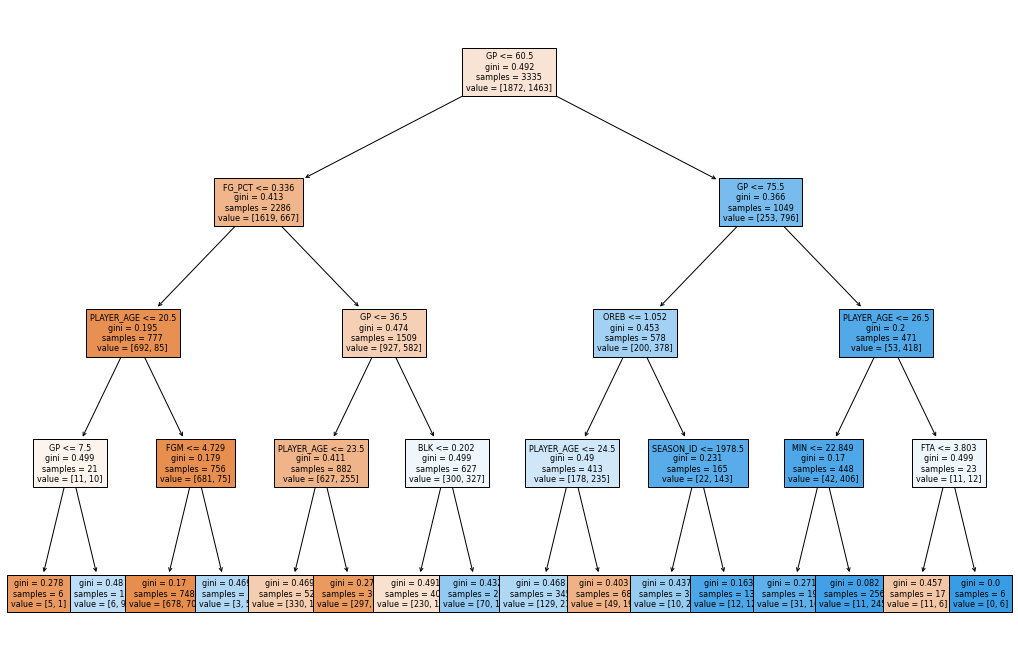

In [45]:
from sklearn import tree

pl.figure(figsize=(18,12))
tree.plot_tree(model, fontsize=8,feature_names=parameter_set,filled=True)
pl.show()

In [46]:
clf=model
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=np.around(values[i], 3)
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=np.around(values[i], 3),
            )
        )

The binary tree structure has 31 nodes and has the following tree structure:

node=0 is a split node with value=[[1872. 1463.]]: go to node 1 if X[:, 2] <= 60.5 else to node 16.
	node=1 is a split node with value=[[1619.  667.]]: go to node 2 if X[:, 6] <= 0.33550000190734863 else to node 9.
		node=2 is a split node with value=[[692.  85.]]: go to node 3 if X[:, 1] <= 20.5 else to node 6.
			node=3 is a split node with value=[[11. 10.]]: go to node 4 if X[:, 2] <= 7.5 else to node 5.
				node=4 is a leaf node with value=[[5. 1.]].
				node=5 is a leaf node with value=[[6. 9.]].
			node=6 is a split node with value=[[681.  75.]]: go to node 7 if X[:, 4] <= 4.729022979736328 else to node 8.
				node=7 is a leaf node with value=[[678.  70.]].
				node=8 is a leaf node with value=[[3. 5.]].
		node=9 is a split node with value=[[927. 582.]]: go to node 10 if X[:, 2] <= 36.5 else to node 13.
			node=10 is a split node with value=[[627. 255.]]: go to node 11 if X[:, 1] <= 23.5 else to node 12

In [33]:
model = joblib.load('decision_tree_model.pkl')

def extract_rules(tree, feature_names):
    """
    Extract rules from a decision tree.

    Parameters:
        tree: Trained decision tree.
        feature_names: List of feature names.

    Returns:
        rules: A string representation of the JavaScript logic.
    """
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            return (
                f"{indent}if (inputs[{name}] <= {threshold}) {{\n"
                + recurse(tree_.children_left[node], depth + 1)
                + f"{indent}}} else {{\n"
                + recurse(tree_.children_right[node], depth + 1)
                + f"{indent}}}\n"
            )
        else:
            return f"{indent}return {tree_.value[node].argmax()};\n"

    return "function predict(inputs) {\n" + recurse(0, 1) + "}"

# Example usage
feature_names = parameter_set
rules = extract_rules(model, feature_names)
print(rules)


AttributeError: 'DecisionTreeClassifier' object has no attribute 'TREE_UNDEFINED'

In [ ]:
Testing_Prediction=Testing_Prediction.assign(Model_Prediction =pred.to_list())

Testing_Prediction        

In [ ]:
Results = Testing_Prediction[['Model_Prediction','SEASON_ID']]
Results.to_csv("Model_Prediction on 2020+ draftees.csv",index=True)